In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('owid-covid-data.csv')

In [4]:
df.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2/24/2020          5.0        5.0   
1      AFG      Asia  Afghanistan  2/25/2020          5.0        0.0   
2      AFG      Asia  Afghanistan  2/26/2020          5.0        0.0   
3      AFG      Asia  Afghanistan  2/27/2020          5.0        0.0   
4      AFG      Asia  Afghanistan  2/28/2020          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [5]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [6]:
asia_cases = df['new_cases'][df['continent'] == 'Asia'].sum()
europe_cases = df['new_cases'][df['continent'] == 'Europe'].sum()
africa_cases = df['new_cases'][df['continent'] == 'Africa'].sum()
north_america_cases = df['new_cases'][df['continent'] == 'North America'].sum()
south_america_cases = df['new_cases'][df['continent'] == 'South America'].sum()
oceania_cases = df['new_cases'][df['continent'] == 'Oceania'].sum()

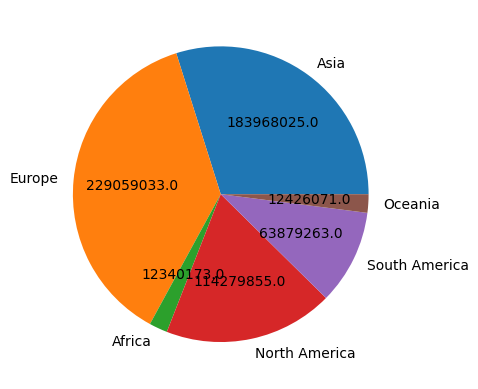

In [7]:
y = np.array([asia_cases, europe_cases, africa_cases, north_america_cases, south_america_cases, oceania_cases])
mylabels = ['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania']

def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.pie(y, labels = mylabels, autopct=absolute_value)
plt.show() 

In [8]:
asia_deaths = df['new_deaths'][df['continent'] == 'Asia'].sum()
europe_deaths = df['new_deaths'][df['continent'] == 'Europe'].sum()
africa_deaths = df['new_deaths'][df['continent'] == 'Africa'].sum()
north_america_deaths = df['new_deaths'][df['continent'] == 'North America'].sum()
south_america_deaths = df['new_deaths'][df['continent'] == 'South America'].sum()
oceania_deaths = df['new_deaths'][df['continent'] == 'Oceania'].sum()

In [9]:
deaths = np.array([asia_deaths, europe_deaths, africa_deaths, north_america_deaths, south_america_deaths, oceania_deaths])

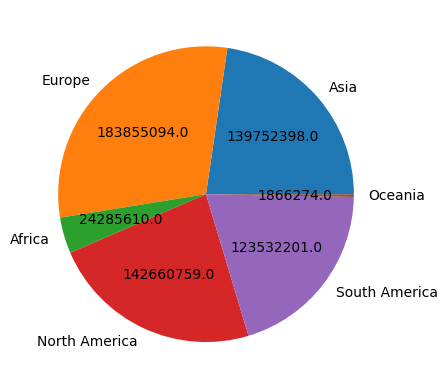

In [10]:
mylabels = ['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania']

def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.pie(deaths, labels = mylabels, autopct=absolute_value)
plt.show() 

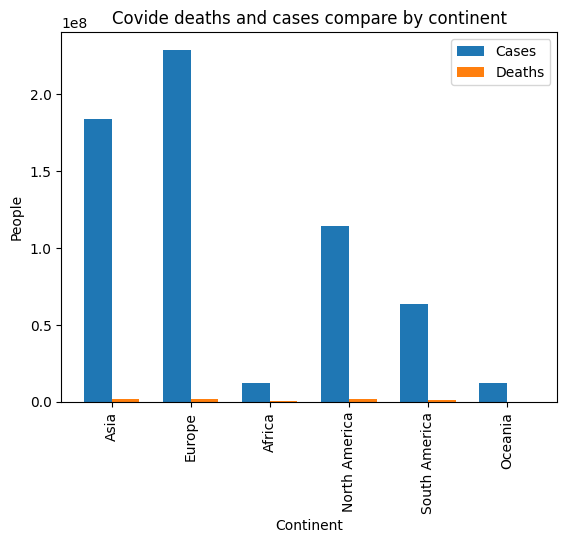

In [11]:
x = ['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania']

index = np.arange(6)
bar_width = 0.35

fig, ax = plt.subplots()
cases = ax.bar(index, y, bar_width,
                label="Cases")

deaths = ax.bar(index+bar_width, deaths,
                 bar_width, label="Deaths")


ax.set_xlabel('Continent')
ax.set_ylabel('People')
ax.set_title('Covide deaths and cases compare by continent')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x, rotation = 90)
ax.legend()

plt.show()

In [13]:
fatal_prc = np.array([asia_deaths, europe_deaths, africa_deaths, north_america_deaths, south_america_deaths, oceania_deaths]) / np.array([asia_cases, europe_cases, africa_cases, north_america_cases, south_america_cases, oceania_cases]) * 100

In [14]:
fatal_prc

array([0.80252814, 0.84795268, 2.07907978, 1.31879781, 2.04297793,
       0.15866642])

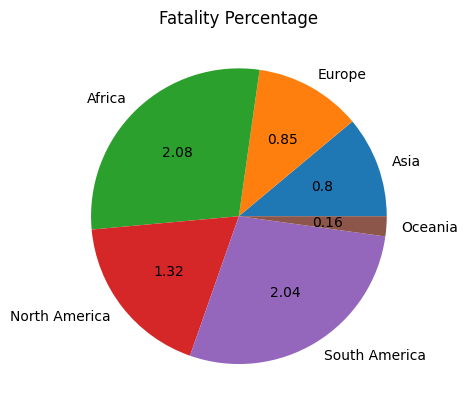

In [28]:
def prc_value(val):
    a  = np.around(val*fatal_prc.sum()/100, decimals=2)
    return a

plt.pie(fatal_prc, labels = mylabels, autopct=prc_value)
plt.title("Fatality Percentage")
plt.show() 